In [58]:
import xgboost as xgb
import pandas as pd
import numpy as np
import dataframe_image as dfi
from datetime import datetime
import sklearn.metrics as mtr
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Função que cria os Modelos

In [47]:
def cria_modelo(df_teste, x_teste, y_teste, x_treino, y_treino):

    #Treino do Modelo XGB e salvamento do tempo
    inicio_tempo_treino_xgb = datetime.now()
    modelo_xgb = xgb.XGBRegressor(gamma = 0.0,
    learning_rate = 0.01,
    max_depth = 4,
    min_child_weight = 8,
    n_estimators = 500)
    modelo_xgb.fit(x_treino, y_treino, eval_set = [(x_treino, y_treino)])

    fim_tempo_treino_xgb = datetime.now()
    tempo_treino_xgb = fim_tempo_treino_xgb - inicio_tempo_treino_xgb
    tempo_treino_xgb = float(f"{str(tempo_treino_xgb.seconds)}.{str(tempo_treino_xgb.microseconds)}")

    #Treino do Modelo RF e salvamento do tempo
    inicio_tempo_treino_rf = datetime.now()
    modelo_rf = RandomForestRegressor(bootstrap = True,
    max_depth = 11,
    max_features = 'log2',
    min_samples_leaf = 7,
    min_samples_split = 6,
    n_estimators = 500)
    modelo_rf.fit(x_treino, y_treino)

    fim_tempo_treino_rf = datetime.now()
    tempo_treino_rf = fim_tempo_treino_rf - inicio_tempo_treino_rf
    tempo_treino_rf = float(f"{str(tempo_treino_rf.seconds)}.{str(tempo_treino_rf.microseconds)}")

    #Treino do Modelo LR e salvamento do tempo
    inicio_tempo_treino_lr = datetime.now()
    modelo_lr = LinearRegression()
    modelo_lr.fit(x_treino, y_treino)

    fim_tempo_treino_lr = datetime.now()
    tempo_treino_lr = fim_tempo_treino_lr - inicio_tempo_treino_lr
    tempo_treino_lr = float(f"{str(tempo_treino_lr.seconds)}.{str(tempo_treino_lr.microseconds)}")

    #Nomeando a coluna que receberá as previsões
    TesteNomeXGB = f"XGB - {TesteNome}"
    TesteNomeRF = f"RF - {TesteNome}"
    TesteNomeLR = f"LR - {TesteNome}"

    #Predição do XGB e salvamento do tempo
    inicio_tempo_previsao_xgb = datetime.now()
    df_teste[f'{TesteNomeXGB}'] = modelo_xgb.predict(x_teste)
    fim_tempo_previsao_xgb = datetime.now()
    tempo_previsao_xgb = fim_tempo_previsao_xgb - inicio_tempo_previsao_xgb
    tempo_previsao_xgb = float(f"{str(tempo_previsao_xgb.seconds)}.{str(tempo_previsao_xgb.microseconds)}")

    #Predição do RF e salvamento do tempo
    inicio_tempo_previsao_rf = datetime.now()
    df_teste[f'{TesteNomeRF}'] = modelo_rf.predict(x_teste)
    fim_tempo_previsao_rf = datetime.now()
    tempo_previsao_rf = fim_tempo_previsao_rf - inicio_tempo_previsao_rf
    tempo_previsao_rf = float(f"{str(tempo_previsao_rf.seconds)}.{str(tempo_previsao_rf.microseconds)}")

    #Predição do LR e salvamento do tempo
    inicio_tempo_previsao_lr = datetime.now()
    df_teste[f'{TesteNomeLR}'] = modelo_lr.predict(x_teste)
    fim_tempo_previsao_lr = datetime.now()
    tempo_previsao_lr = fim_tempo_previsao_lr - inicio_tempo_previsao_lr
    tempo_previsao_lr = float(f"{str(tempo_previsao_lr.seconds)}.{str(tempo_previsao_lr.microseconds)}")

    #Métricas do XGB
    RRSE_xgb = np.sqrt(sum((df_teste["tempo_viagem"] - df_teste[f"{TesteNomeXGB}"]) ** 2) / sum((df_teste["tempo_viagem"] - np.mean(df_teste["tempo_viagem"])) ** 2))
    MAPE_xgb = mtr.mean_absolute_percentage_error(df_teste["tempo_viagem"], df_teste[f"{TesteNomeXGB}"])

    #Métricas do RF
    RRSE_rf = np.sqrt(sum((df_teste["tempo_viagem"] - df_teste[f"{TesteNomeRF}"]) ** 2) / sum((df_teste["tempo_viagem"] - np.mean(df_teste["tempo_viagem"])) ** 2))
    MAPE_rf = mtr.mean_absolute_percentage_error(df_teste["tempo_viagem"], df_teste[f"{TesteNomeRF}"])

    #Métricas do LR
    RRSE_lr = np.sqrt(sum((df_teste["tempo_viagem"] - df_teste[f"{TesteNomeLR}"]) ** 2) / sum((df_teste["tempo_viagem"] - np.mean(df_teste["tempo_viagem"])) ** 2))
    MAPE_lr = mtr.mean_absolute_percentage_error(df_teste["tempo_viagem"], df_teste[f"{TesteNomeLR}"])

    #Salvando as métricas num DataFrame Bonitinho
    metrics.append([f'{TesteNome}', Rota,'XGB','RRSE',RRSE_xgb])
    metrics.append([f'{TesteNome}', Rota,'XGB','MAPE',MAPE_xgb])
    metrics.append([f'{TesteNome}', Rota,'XGB','Tempo de treino',tempo_treino_xgb])
    metrics.append([f'{TesteNome}', Rota,'XGB','Tempo de predição',tempo_previsao_xgb])
    metrics.append([f'{TesteNome}', Rota,'RF','RRSE',RRSE_rf])
    metrics.append([f'{TesteNome}', Rota,'RF','MAPE',MAPE_rf])
    metrics.append([f'{TesteNome}', Rota,'RF','Tempo de treino',tempo_treino_rf])
    metrics.append([f'{TesteNome}', Rota,'RF','Tempo de predição',tempo_previsao_rf])
    metrics.append([f'{TesteNome}', Rota,'LR','RRSE',RRSE_lr])
    metrics.append([f'{TesteNome}', Rota,'LR','MAPE',MAPE_lr])
    metrics.append([f'{TesteNome}', Rota,'LR','Tempo de treino',tempo_treino_lr])
    metrics.append([f'{TesteNome}', Rota,'LR','Tempo de predição',tempo_previsao_lr])

    #Salvando as predições num DataFrame Bonitinho
    for i in range(df_teste.shape[0]):
        predictions.append([f'{TesteNome}', df_teste['data_partida'].iloc[i], Rota,'XGB',df_teste[f"{TesteNomeXGB}"].iloc[i]])
        predictions.append([f'{TesteNome}', df_teste['data_partida'].iloc[i], Rota,'RF',df_teste[f"{TesteNomeRF}"].iloc[i]])
        predictions.append([f'{TesteNome}', df_teste['data_partida'].iloc[i], Rota,'LR',df_teste[f"{TesteNomeLR}"].iloc[i]])
        predictions.append([f'{TesteNome}', df_teste['data_partida'].iloc[i], Rota,'Real',df_teste["tempo_viagem"].iloc[i]])
    

# Parte pra editar os teste

In [48]:
df = pd.read_csv('Clean/rota32893.csv')
df.head()
Rota = "SP - 32893"
#predictions = []
#metrics = []

In [57]:
metrics = pd.DataFrame(metrics, columns=['Teste','Rota','Modelo','Métrica','Valor'])
predictions = pd.DataFrame(predictions, columns=['Teste','Data','Rota','Modelo','Valor'])
metrics.to_csv('metrics.csv', index = False)
predictions.to_csv('predictions.csv', index = False)

In [56]:
metrics

,Teste,Rota,Modelo,Métrica,Valor
0,"0 Teste de Colunas - [dia_semana, tipo_dia, ho...",SP - 33642,XGB,RRSE,0.704792
1,"0 Teste de Colunas - [dia_semana, tipo_dia, ho...",SP - 33642,XGB,MAPE,0.108865
2,"0 Teste de Colunas - [dia_semana, tipo_dia, ho...",SP - 33642,XGB,Tempo de treino,1.787969
3,"0 Teste de Colunas - [dia_semana, tipo_dia, ho...",SP - 33642,XGB,Tempo de predição,0.496900
4,"0 Teste de Colunas - [dia_semana, tipo_dia, ho...",SP - 33642,RF,RRSE,0.718330
...,...,...,...,...,...
547,4 Teste de quantidade de dados para treino - 1...,SP - 32893,RF,Tempo de predição,0.869980
548,4 Teste de quantidade de dados para treino - 1...,SP - 32893,LR,RRSE,0.954929
549,4 Teste de quantidade de dados para treino - 1...,SP - 32893,LR,MAPE,0.236009
550,4 Teste de quantidade de dados para treino - 1...,SP - 32893,LR,Tempo de treino,0.200000


In [50]:
df.shape

(5267, 17)

In [51]:
Colunas = [
    #Primeira parte teste de colunas
    ["partidaTimeStamp", "dia_semana", "tipo_dia", "hora_dia", "turno_dia", "qtdDiasAno"],
    ["dia_semana", "tipo_dia", "hora_dia"],
    ["dia_semana", "tipo_dia", "turno_dia"],
    ["dia_semana", "tipo_dia", "hora_dia", "qtdDiasAno"],
    ["dia_semana", "tipo_dia", "turno_dia", "qtdDiasAno"],
    ["dia_semana", "tipo_dia", "hora_dia","partidaTimeStamp"],
    ["dia_semana", "tipo_dia", "turno_dia","partidaTimeStamp"],

    #Segunda parte teste com dados de clima
    ["dia_semana", "tipo_dia", "hora_dia", "Precipitacao", "Temperatura"],
    ["dia_semana", "tipo_dia", "hora_dia", "Chuva", "Calor"],
    ["dia_semana", "tipo_dia", "hora_dia", "Precipitacao"],
    ["dia_semana", "tipo_dia", "hora_dia", "Temperatura"],
    ["dia_semana", "tipo_dia", "hora_dia", "Chuva"],
    ["dia_semana", "tipo_dia", "hora_dia", "Calor"],

    #Terceira parte teste com os tempo de viagens anteriores
    ["dia_semana", "tipo_dia", "hora_dia", "Precipitacao", "tempo_viagem_1"],
    ["dia_semana", "tipo_dia", "hora_dia", "Precipitacao", "tempo_viagem_1", "tempo_viagem_2"],
    ["dia_semana", "tipo_dia", "hora_dia", "Precipitacao", "tempo_viagem_1", "tempo_viagem_2", "tempo_viagem_3"],
    ["dia_semana", "tipo_dia", "hora_dia", "Precipitacao", "tempo_viagem_1", "tempo_viagem_2", "tempo_viagem_3", "tempo_viagem_4"],
    ["dia_semana", "tipo_dia", "hora_dia", "Precipitacao", "tempo_viagem_1", "tempo_viagem_2", "tempo_viagem_3", "tempo_viagem_4", "tempo_viagem_5"],

    #Quarta parte alternar percentual de treino
    ["dia_semana", "tipo_dia", "hora_dia", "Precipitacao", "tempo_viagem_1", "tempo_viagem_2"],
    ["dia_semana", "tipo_dia", "hora_dia", "Precipitacao", "tempo_viagem_1", "tempo_viagem_2"],
    ["dia_semana", "tipo_dia", "hora_dia", "Precipitacao", "tempo_viagem_1", "tempo_viagem_2"],
    ["dia_semana", "tipo_dia", "hora_dia", "Precipitacao", "tempo_viagem_1", "tempo_viagem_2"],
    ["dia_semana", "tipo_dia", "hora_dia", "Precipitacao", "tempo_viagem_1", "tempo_viagem_2"]
    
]

TestesNome = [
    #Primeira parte teste de colunas
    "0 Teste de Colunas - [dia_semana, tipo_dia, hora_dia, turno_dia, qtdDiasAno, partidaTimeStamp]",
    "1 Teste de Colunas - [dia_semana, tipo_dia, hora_dia]",
    "1 Teste de Colunas - [dia_semana, tipo_dia, turno_dia]",
    "1 Teste de Colunas - [dia_semana, tipo_dia, hora_dia, qtdDiasAno]",
    "1 Teste de Colunas - [dia_semana, tipo_dia, turno_dia, qtdDiasAno]",
    "1 Teste de Colunas - [dia_semana, tipo_dia, hora_dia, partidaTimeStamp]",
    "1 Teste de Colunas - [dia_semana, tipo_dia, turno_dia, partidaTimeStamp]",

    #Segunda parte teste com dados de clima
    "2 Teste Clima - [dia_semana, tipo_dia, hora_dia, Precipitacao, Temperatura]",
    "2 Teste Clima - [dia_semana, tipo_dia, hora_dia, Chuva, Calor]",
    "2 Teste Clima - [dia_semana, tipo_dia, hora_dia, Precipitacao]",
    "2 Teste Clima - [dia_semana, tipo_dia, hora_dia, Temperatura]",
    "2 Teste Clima - [dia_semana, tipo_dia, hora_dia, Chuva]",
    "2 Teste Clima - [dia_semana, tipo_dia, hora_dia, Calor]",

    #Terceira parte teste com os tempo de viagens anteriores
    "3 Teste com os tempos de viagem anteriores - [dia_semana, tipo_dia, hora_dia, Precipitacao, tempo_viagem_1]",
    "3 Teste com os tempos de viagem anteriores - [dia_semana, tipo_dia, hora_dia, Precipitacao, tempo_viagem_1, tempo_viagem_2]",
    "3 Teste com os tempos de viagem anteriores - [dia_semana, tipo_dia, hora_dia, Precipitacao, tempo_viagem_1, tempo_viagem_2, tempo_viagem_3]",
    "3 Teste com os tempos de viagem anteriores - [dia_semana, tipo_dia, hora_dia, Precipitacao, tempo_viagem_1, tempo_viagem_2, tempo_viagem_3, tempo_viagem_4]",
    "3 Teste com os tempos de viagem anteriores - [dia_semana, tipo_dia, hora_dia, Precipitacao, tempo_viagem_1, tempo_viagem_2, tempo_viagem_3, tempo_viagem_4, tempo_viagem_5]",

    #Quarta parte alternar percentual de treino
    "4 Teste de quantidade de dados para treino - 2 semanas - [dia_semana, tipo_dia, hora_dia, Precipitacao, tempo_viagem_1, tempo_viagem_2]",
    "4 Teste de quantidade de dados para treino - 4 semanas - [dia_semana, tipo_dia, hora_dia, Precipitacao, tempo_viagem_1, tempo_viagem_2]",
    "4 Teste de quantidade de dados para treino - 6 semanas - [dia_semana, tipo_dia, hora_dia, Precipitacao, tempo_viagem_1, tempo_viagem_2]",
    "4 Teste de quantidade de dados para treino - 8 semanas - [dia_semana, tipo_dia, hora_dia, Precipitacao, tempo_viagem_1, tempo_viagem_2]",
    "4 Teste de quantidade de dados para treino - 10 semanas - [dia_semana, tipo_dia, hora_dia, Precipitacao, tempo_viagem_1, tempo_viagem_2]"

]

PercentTeste = [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.152173, 0.304347, 0.456521, 0.608695, 0.760869]


In [52]:
print(f'{len(Colunas)} --- {len(TestesNome)} --- {len(PercentTeste)}')

23 --- 23 --- 23


In [53]:
for i in range(len(TestesNome)):
    shape = int(df.shape[0] * (1-PercentTeste[i]))
    df = df.sort_values(by=["data_partida"], ascending=False)
    df_teste = df[:shape]
    df_treino = df[shape:]

    TesteNome = TestesNome[i]

    x_teste = df_teste[Colunas[i]]
    y_teste = df_teste["tempo_viagem"]
    x_treino = df_treino[Colunas[i]]
    y_treino = df_treino["tempo_viagem"]

    cria_modelo(df_teste, x_teste, y_teste, x_treino, y_treino)

[0]	validation_0-rmse:2882.60855
[1]	validation_0-rmse:2856.46815
[2]	validation_0-rmse:2830.61263
[3]	validation_0-rmse:2805.03930
[4]	validation_0-rmse:2779.74480
[5]	validation_0-rmse:2754.72706
[6]	validation_0-rmse:2729.98310
[7]	validation_0-rmse:2705.51067
[8]	validation_0-rmse:2681.30691
[9]	validation_0-rmse:2657.36964
[10]	validation_0-rmse:2633.69603
[11]	validation_0-rmse:2610.28401
[12]	validation_0-rmse:2587.13069
[13]	validation_0-rmse:2564.23398
[14]	validation_0-rmse:2541.59129
[15]	validation_0-rmse:2519.20024
[16]	validation_0-rmse:2497.05821
[17]	validation_0-rmse:2475.16338
[18]	validation_0-rmse:2453.51317
[19]	validation_0-rmse:2432.10210
[20]	validation_0-rmse:2410.93363
[21]	validation_0-rmse:2390.00036
[22]	validation_0-rmse:2369.30527
[23]	validation_0-rmse:2348.84104
[24]	validation_0-rmse:2328.61010
[25]	validation_0-rmse:2308.60603
[26]	validation_0-rmse:2288.83136
[27]	validation_0-rmse:2269.27912
[28]	validation_0-rmse:2249.95202
[29]	validation_0-rmse:2

C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeXGB}'] = modelo_xgb.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeRF}'] = modelo_rf.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

[8]	validation_0-rmse:2681.36552
[9]	validation_0-rmse:2657.43752
[10]	validation_0-rmse:2633.77392
[11]	validation_0-rmse:2610.37225
[12]	validation_0-rmse:2587.23020
[13]	validation_0-rmse:2564.34505
[14]	validation_0-rmse:2541.71456
[15]	validation_0-rmse:2519.33614
[16]	validation_0-rmse:2497.20763
[17]	validation_0-rmse:2475.32656
[18]	validation_0-rmse:2453.69050
[19]	validation_0-rmse:2432.31032
[20]	validation_0-rmse:2411.15728
[21]	validation_0-rmse:2390.25569
[22]	validation_0-rmse:2369.57682
[23]	validation_0-rmse:2349.14255
[24]	validation_0-rmse:2328.92643
[25]	validation_0-rmse:2308.95541
[26]	validation_0-rmse:2289.19591
[27]	validation_0-rmse:2269.67479
[28]	validation_0-rmse:2250.36586
[29]	validation_0-rmse:2231.28878
[30]	validation_0-rmse:2212.41730
[31]	validation_0-rmse:2193.77840
[32]	validation_0-rmse:2175.33858
[33]	validation_0-rmse:2157.11447
[34]	validation_0-rmse:2139.11139
[35]	validation_0-rmse:2121.30461
[36]	validation_0-rmse:2103.71947
[37]	validation_

C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeXGB}'] = modelo_xgb.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeRF}'] = modelo_rf.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

[0]	validation_0-rmse:2882.89777
[1]	validation_0-rmse:2857.04650
[2]	validation_0-rmse:2831.47992
[3]	validation_0-rmse:2806.19556
[4]	validation_0-rmse:2781.19078
[5]	validation_0-rmse:2756.46287
[6]	validation_0-rmse:2732.00929
[7]	validation_0-rmse:2707.82749
[8]	validation_0-rmse:2683.91498
[9]	validation_0-rmse:2660.26911
[10]	validation_0-rmse:2636.88760
[11]	validation_0-rmse:2613.76780
[12]	validation_0-rmse:2590.90740
[13]	validation_0-rmse:2568.30393
[14]	validation_0-rmse:2545.95503
[15]	validation_0-rmse:2523.85830
[16]	validation_0-rmse:2502.01147
[17]	validation_0-rmse:2480.41208
[18]	validation_0-rmse:2459.05809
[19]	validation_0-rmse:2437.94687
[20]	validation_0-rmse:2417.07653
[21]	validation_0-rmse:2396.44461
[22]	validation_0-rmse:2376.04888
[23]	validation_0-rmse:2355.88726
[24]	validation_0-rmse:2335.95744
[25]	validation_0-rmse:2316.25744
[26]	validation_0-rmse:2296.78502
[27]	validation_0-rmse:2277.53812
[28]	validation_0-rmse:2258.51462
[29]	validation_0-rmse:2

C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeXGB}'] = modelo_xgb.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeRF}'] = modelo_rf.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

[13]	validation_0-rmse:2564.23810
[14]	validation_0-rmse:2541.59632
[15]	validation_0-rmse:2519.20593
[16]	validation_0-rmse:2497.06431
[17]	validation_0-rmse:2475.17017
[18]	validation_0-rmse:2453.52095
[19]	validation_0-rmse:2432.11212
[20]	validation_0-rmse:2410.94419
[21]	validation_0-rmse:2390.01307
[22]	validation_0-rmse:2369.31929
[23]	validation_0-rmse:2348.85725
[24]	validation_0-rmse:2328.62680
[25]	validation_0-rmse:2308.62493
[26]	validation_0-rmse:2288.85160
[27]	validation_0-rmse:2269.30149
[28]	validation_0-rmse:2249.97566
[29]	validation_0-rmse:2230.86757
[30]	validation_0-rmse:2211.98097
[31]	validation_0-rmse:2193.31128
[32]	validation_0-rmse:2174.85448
[33]	validation_0-rmse:2156.60961
[34]	validation_0-rmse:2138.57590
[35]	validation_0-rmse:2120.75188
[36]	validation_0-rmse:2103.13356
[37]	validation_0-rmse:2085.71881
[38]	validation_0-rmse:2068.50815
[39]	validation_0-rmse:2051.49920
[40]	validation_0-rmse:2034.68495
[41]	validation_0-rmse:2018.06988
[42]	validatio

C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeXGB}'] = modelo_xgb.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeRF}'] = modelo_rf.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

[3]	validation_0-rmse:2805.98770
[4]	validation_0-rmse:2780.93030
[5]	validation_0-rmse:2756.14964
[6]	validation_0-rmse:2731.64304
[7]	validation_0-rmse:2707.40793
[8]	validation_0-rmse:2683.44192
[9]	validation_0-rmse:2659.74246
[10]	validation_0-rmse:2636.30695
[11]	validation_0-rmse:2613.13304
[12]	validation_0-rmse:2590.21832
[13]	validation_0-rmse:2567.56021
[14]	validation_0-rmse:2545.15652
[15]	validation_0-rmse:2523.00469
[16]	validation_0-rmse:2501.10244
[17]	validation_0-rmse:2479.44747
[18]	validation_0-rmse:2458.03751
[19]	validation_0-rmse:2436.87023
[20]	validation_0-rmse:2415.94335
[21]	validation_0-rmse:2395.25456
[22]	validation_0-rmse:2374.80177
[23]	validation_0-rmse:2354.57935
[24]	validation_0-rmse:2334.58840
[25]	validation_0-rmse:2314.83506
[26]	validation_0-rmse:2295.30901
[27]	validation_0-rmse:2276.00798
[28]	validation_0-rmse:2256.92999
[29]	validation_0-rmse:2238.06564
[30]	validation_0-rmse:2219.42723
[31]	validation_0-rmse:2201.00574
[32]	validation_0-rms

C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeXGB}'] = modelo_xgb.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeRF}'] = modelo_rf.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

[7]	validation_0-rmse:2705.51067
[8]	validation_0-rmse:2681.30691
[9]	validation_0-rmse:2657.36964
[10]	validation_0-rmse:2633.69603
[11]	validation_0-rmse:2610.28401
[12]	validation_0-rmse:2587.13069
[13]	validation_0-rmse:2564.23398
[14]	validation_0-rmse:2541.59129
[15]	validation_0-rmse:2519.20024
[16]	validation_0-rmse:2497.05821
[17]	validation_0-rmse:2475.16338
[18]	validation_0-rmse:2453.51317
[19]	validation_0-rmse:2432.10210
[20]	validation_0-rmse:2410.93363
[21]	validation_0-rmse:2390.00036
[22]	validation_0-rmse:2369.30527
[23]	validation_0-rmse:2348.84104
[24]	validation_0-rmse:2328.61010
[25]	validation_0-rmse:2308.60603
[26]	validation_0-rmse:2288.83136
[27]	validation_0-rmse:2269.27912
[28]	validation_0-rmse:2249.95202
[29]	validation_0-rmse:2230.84249
[30]	validation_0-rmse:2211.95458
[31]	validation_0-rmse:2193.28383
[32]	validation_0-rmse:2174.82408
[33]	validation_0-rmse:2156.57937
[34]	validation_0-rmse:2138.54272
[35]	validation_0-rmse:2120.71806
[36]	validation_0

C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeXGB}'] = modelo_xgb.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeRF}'] = modelo_rf.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

[8]	validation_0-rmse:2683.32308
[9]	validation_0-rmse:2659.60455
[10]	validation_0-rmse:2636.15869
[11]	validation_0-rmse:2612.96440
[12]	validation_0-rmse:2590.03830
[13]	validation_0-rmse:2567.35839
[14]	validation_0-rmse:2544.93243
[15]	validation_0-rmse:2522.73962
[16]	validation_0-rmse:2500.81331
[17]	validation_0-rmse:2479.11569
[18]	validation_0-rmse:2457.67998
[19]	validation_0-rmse:2436.46841
[20]	validation_0-rmse:2415.51409
[21]	validation_0-rmse:2394.77956
[22]	validation_0-rmse:2374.26921
[23]	validation_0-rmse:2353.99221
[24]	validation_0-rmse:2333.95645
[25]	validation_0-rmse:2314.13863
[26]	validation_0-rmse:2294.54843
[27]	validation_0-rmse:2275.18202
[28]	validation_0-rmse:2256.03917
[29]	validation_0-rmse:2237.12472
[30]	validation_0-rmse:2218.43211
[31]	validation_0-rmse:2199.95619
[32]	validation_0-rmse:2181.69496
[33]	validation_0-rmse:2163.65918
[34]	validation_0-rmse:2145.82088
[35]	validation_0-rmse:2128.19114
[36]	validation_0-rmse:2110.76696
[37]	validation_

C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeXGB}'] = modelo_xgb.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeRF}'] = modelo_rf.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

[6]	validation_0-rmse:2730.02468
[7]	validation_0-rmse:2705.56034
[8]	validation_0-rmse:2681.36552
[9]	validation_0-rmse:2657.43752
[10]	validation_0-rmse:2633.77392
[11]	validation_0-rmse:2610.37225
[12]	validation_0-rmse:2587.23020
[13]	validation_0-rmse:2564.34505
[14]	validation_0-rmse:2541.71456
[15]	validation_0-rmse:2519.33614
[16]	validation_0-rmse:2497.20763
[17]	validation_0-rmse:2475.32656
[18]	validation_0-rmse:2453.69050
[19]	validation_0-rmse:2432.31032
[20]	validation_0-rmse:2411.15728
[21]	validation_0-rmse:2390.25569
[22]	validation_0-rmse:2369.57682
[23]	validation_0-rmse:2349.14255
[24]	validation_0-rmse:2328.92643
[25]	validation_0-rmse:2308.95541
[26]	validation_0-rmse:2289.19591
[27]	validation_0-rmse:2269.67479
[28]	validation_0-rmse:2250.36586
[29]	validation_0-rmse:2231.28864
[30]	validation_0-rmse:2212.41707
[31]	validation_0-rmse:2193.77800
[32]	validation_0-rmse:2175.33802
[33]	validation_0-rmse:2157.11374
[34]	validation_0-rmse:2139.11039
[35]	validation_0-

C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeXGB}'] = modelo_xgb.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeRF}'] = modelo_rf.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

[0]	validation_0-rmse:2882.61345
[1]	validation_0-rmse:2856.47808
[2]	validation_0-rmse:2830.62780
[3]	validation_0-rmse:2805.06000
[4]	validation_0-rmse:2779.77184
[5]	validation_0-rmse:2754.76098
[6]	validation_0-rmse:2730.02468
[7]	validation_0-rmse:2705.56034
[8]	validation_0-rmse:2681.36552
[9]	validation_0-rmse:2657.43752
[10]	validation_0-rmse:2633.77392
[11]	validation_0-rmse:2610.37225
[12]	validation_0-rmse:2587.23020
[13]	validation_0-rmse:2564.34505
[14]	validation_0-rmse:2541.71456
[15]	validation_0-rmse:2519.33614
[16]	validation_0-rmse:2497.20763
[17]	validation_0-rmse:2475.32656
[18]	validation_0-rmse:2453.69050
[19]	validation_0-rmse:2432.31032
[20]	validation_0-rmse:2411.15728
[21]	validation_0-rmse:2390.25569
[22]	validation_0-rmse:2369.57682
[23]	validation_0-rmse:2349.14255
[24]	validation_0-rmse:2328.92643
[25]	validation_0-rmse:2308.95541
[26]	validation_0-rmse:2289.19591
[27]	validation_0-rmse:2269.67479
[28]	validation_0-rmse:2250.36586
[29]	validation_0-rmse:2

C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeXGB}'] = modelo_xgb.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeRF}'] = modelo_rf.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

[0]	validation_0-rmse:2882.61345
[1]	validation_0-rmse:2856.47808
[2]	validation_0-rmse:2830.62780
[3]	validation_0-rmse:2805.06000
[4]	validation_0-rmse:2779.77184
[5]	validation_0-rmse:2754.76098
[6]	validation_0-rmse:2730.02468
[7]	validation_0-rmse:2705.56034
[8]	validation_0-rmse:2681.36552
[9]	validation_0-rmse:2657.43752
[10]	validation_0-rmse:2633.77392
[11]	validation_0-rmse:2610.37225
[12]	validation_0-rmse:2587.23020
[13]	validation_0-rmse:2564.34505
[14]	validation_0-rmse:2541.71456
[15]	validation_0-rmse:2519.33614
[16]	validation_0-rmse:2497.20763
[17]	validation_0-rmse:2475.32656
[18]	validation_0-rmse:2453.69050
[19]	validation_0-rmse:2432.31032
[20]	validation_0-rmse:2411.15728
[21]	validation_0-rmse:2390.25569
[22]	validation_0-rmse:2369.57682
[23]	validation_0-rmse:2349.14255
[24]	validation_0-rmse:2328.92643
[25]	validation_0-rmse:2308.95541
[26]	validation_0-rmse:2289.19591
[27]	validation_0-rmse:2269.67479
[28]	validation_0-rmse:2250.36586
[29]	validation_0-rmse:2

C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeXGB}'] = modelo_xgb.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeRF}'] = modelo_rf.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

[1]	validation_0-rmse:2856.47808
[2]	validation_0-rmse:2830.62780
[3]	validation_0-rmse:2805.06000
[4]	validation_0-rmse:2779.77184
[5]	validation_0-rmse:2754.76098
[6]	validation_0-rmse:2730.02468
[7]	validation_0-rmse:2705.56034
[8]	validation_0-rmse:2681.36552
[9]	validation_0-rmse:2657.43752
[10]	validation_0-rmse:2633.77392
[11]	validation_0-rmse:2610.37225
[12]	validation_0-rmse:2587.23020
[13]	validation_0-rmse:2564.34505
[14]	validation_0-rmse:2541.71456
[15]	validation_0-rmse:2519.33614
[16]	validation_0-rmse:2497.20763
[17]	validation_0-rmse:2475.32656
[18]	validation_0-rmse:2453.69050
[19]	validation_0-rmse:2432.31032
[20]	validation_0-rmse:2411.15728
[21]	validation_0-rmse:2390.25569
[22]	validation_0-rmse:2369.57682
[23]	validation_0-rmse:2349.14255
[24]	validation_0-rmse:2328.92643
[25]	validation_0-rmse:2308.95541
[26]	validation_0-rmse:2289.19591
[27]	validation_0-rmse:2269.67479
[28]	validation_0-rmse:2250.36586
[29]	validation_0-rmse:2231.28864
[30]	validation_0-rmse:

C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeXGB}'] = modelo_xgb.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeRF}'] = modelo_rf.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

[0]	validation_0-rmse:2882.61345
[1]	validation_0-rmse:2856.47808
[2]	validation_0-rmse:2830.62780
[3]	validation_0-rmse:2805.06000
[4]	validation_0-rmse:2779.77184
[5]	validation_0-rmse:2754.76098
[6]	validation_0-rmse:2730.02468
[7]	validation_0-rmse:2705.56034
[8]	validation_0-rmse:2681.36552
[9]	validation_0-rmse:2657.43752
[10]	validation_0-rmse:2633.77392
[11]	validation_0-rmse:2610.37225
[12]	validation_0-rmse:2587.23020
[13]	validation_0-rmse:2564.34505
[14]	validation_0-rmse:2541.71456
[15]	validation_0-rmse:2519.33614
[16]	validation_0-rmse:2497.20763
[17]	validation_0-rmse:2475.32656
[18]	validation_0-rmse:2453.69050
[19]	validation_0-rmse:2432.31032
[20]	validation_0-rmse:2411.15728
[21]	validation_0-rmse:2390.25569
[22]	validation_0-rmse:2369.57682
[23]	validation_0-rmse:2349.14255
[24]	validation_0-rmse:2328.92643
[25]	validation_0-rmse:2308.95541
[26]	validation_0-rmse:2289.19591
[27]	validation_0-rmse:2269.67479
[28]	validation_0-rmse:2250.36586
[29]	validation_0-rmse:2

C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeXGB}'] = modelo_xgb.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeRF}'] = modelo_rf.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

[1]	validation_0-rmse:2856.47808
[2]	validation_0-rmse:2830.62780
[3]	validation_0-rmse:2805.06000
[4]	validation_0-rmse:2779.77184
[5]	validation_0-rmse:2754.76098
[6]	validation_0-rmse:2730.02468
[7]	validation_0-rmse:2705.56034
[8]	validation_0-rmse:2681.36552
[9]	validation_0-rmse:2657.43752
[10]	validation_0-rmse:2633.77392
[11]	validation_0-rmse:2610.37225
[12]	validation_0-rmse:2587.23020
[13]	validation_0-rmse:2564.34505
[14]	validation_0-rmse:2541.71456
[15]	validation_0-rmse:2519.33614
[16]	validation_0-rmse:2497.20763
[17]	validation_0-rmse:2475.32656
[18]	validation_0-rmse:2453.69050
[19]	validation_0-rmse:2432.31032
[20]	validation_0-rmse:2411.15728
[21]	validation_0-rmse:2390.25569
[22]	validation_0-rmse:2369.57682
[23]	validation_0-rmse:2349.14255
[24]	validation_0-rmse:2328.92643
[25]	validation_0-rmse:2308.95541
[26]	validation_0-rmse:2289.19591
[27]	validation_0-rmse:2269.67479
[28]	validation_0-rmse:2250.36586
[29]	validation_0-rmse:2231.28878
[30]	validation_0-rmse:

C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeXGB}'] = modelo_xgb.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeRF}'] = modelo_rf.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

[0]	validation_0-rmse:2882.59889
[1]	validation_0-rmse:2856.46796
[2]	validation_0-rmse:2830.62186
[3]	validation_0-rmse:2805.05779
[4]	validation_0-rmse:2779.77282
[5]	validation_0-rmse:2754.76068
[6]	validation_0-rmse:2730.00932
[7]	validation_0-rmse:2705.52949
[8]	validation_0-rmse:2681.31873
[9]	validation_0-rmse:2657.37452
[10]	validation_0-rmse:2633.70310
[11]	validation_0-rmse:2610.28324
[12]	validation_0-rmse:2587.12258
[13]	validation_0-rmse:2564.21868
[14]	validation_0-rmse:2541.57568
[15]	validation_0-rmse:2519.17686
[16]	validation_0-rmse:2497.02904
[17]	validation_0-rmse:2475.12605
[18]	validation_0-rmse:2453.46927
[19]	validation_0-rmse:2432.05722
[20]	validation_0-rmse:2410.88199
[21]	validation_0-rmse:2389.94495
[22]	validation_0-rmse:2369.24580
[23]	validation_0-rmse:2348.77663
[24]	validation_0-rmse:2328.54116
[25]	validation_0-rmse:2308.53421
[26]	validation_0-rmse:2288.75494
[27]	validation_0-rmse:2269.19833
[28]	validation_0-rmse:2249.86572
[29]	validation_0-rmse:2

C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeXGB}'] = modelo_xgb.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeRF}'] = modelo_rf.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

[0]	validation_0-rmse:2882.59164
[1]	validation_0-rmse:2856.45338
[2]	validation_0-rmse:2830.59989
[3]	validation_0-rmse:2805.02836
[4]	validation_0-rmse:2779.73587
[5]	validation_0-rmse:2754.71462
[6]	validation_0-rmse:2729.95242
[7]	validation_0-rmse:2705.46173
[8]	validation_0-rmse:2681.24007
[9]	validation_0-rmse:2657.28495
[10]	validation_0-rmse:2633.60384
[11]	validation_0-rmse:2610.17300
[12]	validation_0-rmse:2587.00131
[13]	validation_0-rmse:2564.08624
[14]	validation_0-rmse:2541.43326
[15]	validation_0-rmse:2519.02324
[16]	validation_0-rmse:2496.86285
[17]	validation_0-rmse:2474.94991
[18]	validation_0-rmse:2453.28721
[19]	validation_0-rmse:2431.85930
[20]	validation_0-rmse:2410.67183
[21]	validation_0-rmse:2389.72231
[22]	validation_0-rmse:2369.00546
[23]	validation_0-rmse:2348.52897
[24]	validation_0-rmse:2328.28174
[25]	validation_0-rmse:2308.26504
[26]	validation_0-rmse:2288.47208
[27]	validation_0-rmse:2268.90598
[28]	validation_0-rmse:2249.56326
[29]	validation_0-rmse:2

C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeXGB}'] = modelo_xgb.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeRF}'] = modelo_rf.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

[0]	validation_0-rmse:2882.58589
[1]	validation_0-rmse:2856.44393
[2]	validation_0-rmse:2830.58674
[3]	validation_0-rmse:2805.02974
[4]	validation_0-rmse:2779.70891
[5]	validation_0-rmse:2754.68776
[6]	validation_0-rmse:2729.93923
[7]	validation_0-rmse:2705.44371
[8]	validation_0-rmse:2681.23512
[9]	validation_0-rmse:2657.27455
[10]	validation_0-rmse:2633.58601
[11]	validation_0-rmse:2610.16748
[12]	validation_0-rmse:2586.98961
[13]	validation_0-rmse:2564.07608
[14]	validation_0-rmse:2541.45016
[15]	validation_0-rmse:2519.04132
[16]	validation_0-rmse:2496.89031
[17]	validation_0-rmse:2475.01021
[18]	validation_0-rmse:2453.34681
[19]	validation_0-rmse:2431.92889
[20]	validation_0-rmse:2410.74778
[21]	validation_0-rmse:2389.77025
[22]	validation_0-rmse:2369.05995
[23]	validation_0-rmse:2348.58362
[24]	validation_0-rmse:2328.36168
[25]	validation_0-rmse:2308.33324
[26]	validation_0-rmse:2288.53796
[27]	validation_0-rmse:2268.97162
[28]	validation_0-rmse:2249.62816
[29]	validation_0-rmse:2

C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeXGB}'] = modelo_xgb.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeRF}'] = modelo_rf.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

[0]	validation_0-rmse:2882.57732
[1]	validation_0-rmse:2856.43938
[2]	validation_0-rmse:2830.55028
[3]	validation_0-rmse:2804.97697
[4]	validation_0-rmse:2779.68290
[5]	validation_0-rmse:2754.62837
[6]	validation_0-rmse:2729.88275
[7]	validation_0-rmse:2705.38908
[8]	validation_0-rmse:2681.14573
[9]	validation_0-rmse:2657.18524
[10]	validation_0-rmse:2633.48634
[11]	validation_0-rmse:2610.04953
[12]	validation_0-rmse:2586.85267
[13]	validation_0-rmse:2563.92954
[14]	validation_0-rmse:2541.28847
[15]	validation_0-rmse:2518.88450
[16]	validation_0-rmse:2496.72983
[17]	validation_0-rmse:2474.83512
[18]	validation_0-rmse:2453.16776
[19]	validation_0-rmse:2431.72368
[20]	validation_0-rmse:2410.54055
[21]	validation_0-rmse:2389.59187
[22]	validation_0-rmse:2368.87879
[23]	validation_0-rmse:2348.39407
[24]	validation_0-rmse:2328.14671
[25]	validation_0-rmse:2308.12095
[26]	validation_0-rmse:2288.32428
[27]	validation_0-rmse:2268.74876
[28]	validation_0-rmse:2249.39779
[29]	validation_0-rmse:2

C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeXGB}'] = modelo_xgb.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeRF}'] = modelo_rf.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

[0]	validation_0-rmse:2882.57732
[1]	validation_0-rmse:2856.43938
[2]	validation_0-rmse:2830.55028
[3]	validation_0-rmse:2804.97697
[4]	validation_0-rmse:2779.68290
[5]	validation_0-rmse:2754.62837
[6]	validation_0-rmse:2729.88275
[7]	validation_0-rmse:2705.38908
[8]	validation_0-rmse:2681.14573
[9]	validation_0-rmse:2657.18524
[10]	validation_0-rmse:2633.48634
[11]	validation_0-rmse:2610.04953
[12]	validation_0-rmse:2586.85267
[13]	validation_0-rmse:2563.92954
[14]	validation_0-rmse:2541.28847
[15]	validation_0-rmse:2518.88450
[16]	validation_0-rmse:2496.72983
[17]	validation_0-rmse:2474.83512
[18]	validation_0-rmse:2453.16776
[19]	validation_0-rmse:2431.72368
[20]	validation_0-rmse:2410.54055
[21]	validation_0-rmse:2389.59187
[22]	validation_0-rmse:2368.87879
[23]	validation_0-rmse:2348.39352
[24]	validation_0-rmse:2328.14293
[25]	validation_0-rmse:2308.12433
[26]	validation_0-rmse:2288.32269
[27]	validation_0-rmse:2268.75069
[28]	validation_0-rmse:2249.39497
[29]	validation_0-rmse:2

C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeXGB}'] = modelo_xgb.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeRF}'] = modelo_rf.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

[0]	validation_0-rmse:2978.20680
[1]	validation_0-rmse:2951.43342
[2]	validation_0-rmse:2924.95079
[3]	validation_0-rmse:2898.75415
[4]	validation_0-rmse:2872.84387
[5]	validation_0-rmse:2847.21402
[6]	validation_0-rmse:2821.86412
[7]	validation_0-rmse:2796.79193
[8]	validation_0-rmse:2771.99315
[9]	validation_0-rmse:2747.46711
[10]	validation_0-rmse:2723.20874
[11]	validation_0-rmse:2699.21804
[12]	validation_0-rmse:2675.50461
[13]	validation_0-rmse:2652.03829
[14]	validation_0-rmse:2628.83024
[15]	validation_0-rmse:2605.87863
[16]	validation_0-rmse:2583.19590
[17]	validation_0-rmse:2560.75119
[18]	validation_0-rmse:2538.55696
[19]	validation_0-rmse:2516.62356
[20]	validation_0-rmse:2494.92229
[21]	validation_0-rmse:2473.46460
[22]	validation_0-rmse:2452.25780
[23]	validation_0-rmse:2431.27600
[24]	validation_0-rmse:2410.52205
[25]	validation_0-rmse:2390.01993
[26]	validation_0-rmse:2369.73645
[27]	validation_0-rmse:2349.68288
[28]	validation_0-rmse:2329.84678
[29]	validation_0-rmse:2

C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeXGB}'] = modelo_xgb.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeRF}'] = modelo_rf.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

[0]	validation_0-rmse:2967.87884
[1]	validation_0-rmse:2941.00930
[2]	validation_0-rmse:2914.43186
[3]	validation_0-rmse:2888.14386
[4]	validation_0-rmse:2862.14257
[5]	validation_0-rmse:2836.42531
[6]	validation_0-rmse:2810.98943
[7]	validation_0-rmse:2785.83226
[8]	validation_0-rmse:2760.95126
[9]	validation_0-rmse:2736.34388
[10]	validation_0-rmse:2712.00748
[11]	validation_0-rmse:2687.93958
[12]	validation_0-rmse:2664.11713
[13]	validation_0-rmse:2640.57837
[14]	validation_0-rmse:2617.28007
[15]	validation_0-rmse:2594.24039
[16]	validation_0-rmse:2571.45684
[17]	validation_0-rmse:2548.94631
[18]	validation_0-rmse:2526.66758
[19]	validation_0-rmse:2504.63795
[20]	validation_0-rmse:2482.84895
[21]	validation_0-rmse:2461.32831
[22]	validation_0-rmse:2440.02443
[23]	validation_0-rmse:2418.96021
[24]	validation_0-rmse:2398.13320
[25]	validation_0-rmse:2377.54630
[26]	validation_0-rmse:2357.18571
[27]	validation_0-rmse:2337.05595
[28]	validation_0-rmse:2317.15483
[29]	validation_0-rmse:2

C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeXGB}'] = modelo_xgb.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeRF}'] = modelo_rf.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

[0]	validation_0-rmse:2936.63163
[1]	validation_0-rmse:2910.08159
[2]	validation_0-rmse:2883.82025
[3]	validation_0-rmse:2857.84511
[4]	validation_0-rmse:2832.15328
[5]	validation_0-rmse:2806.74232
[6]	validation_0-rmse:2781.60943
[7]	validation_0-rmse:2756.75219
[8]	validation_0-rmse:2732.16783
[9]	validation_0-rmse:2707.85401
[10]	validation_0-rmse:2683.80811
[11]	validation_0-rmse:2660.02763
[12]	validation_0-rmse:2636.51010
[13]	validation_0-rmse:2613.25316
[14]	validation_0-rmse:2590.25429
[15]	validation_0-rmse:2567.51112
[16]	validation_0-rmse:2545.02132
[17]	validation_0-rmse:2522.78210
[18]	validation_0-rmse:2500.79195
[19]	validation_0-rmse:2479.04768
[20]	validation_0-rmse:2457.54761
[21]	validation_0-rmse:2436.28923
[22]	validation_0-rmse:2415.27607
[23]	validation_0-rmse:2394.49256
[24]	validation_0-rmse:2373.94409
[25]	validation_0-rmse:2353.63392
[26]	validation_0-rmse:2333.54937
[27]	validation_0-rmse:2313.69720
[28]	validation_0-rmse:2294.06516
[29]	validation_0-rmse:2

C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeXGB}'] = modelo_xgb.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeRF}'] = modelo_rf.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

[0]	validation_0-rmse:2889.16694
[1]	validation_0-rmse:2862.94557
[2]	validation_0-rmse:2837.00996
[3]	validation_0-rmse:2811.35721
[4]	validation_0-rmse:2785.99649
[5]	validation_0-rmse:2760.91294
[6]	validation_0-rmse:2736.08920
[7]	validation_0-rmse:2711.53779
[8]	validation_0-rmse:2687.26801
[9]	validation_0-rmse:2663.26526
[10]	validation_0-rmse:2639.51195
[11]	validation_0-rmse:2616.02059
[12]	validation_0-rmse:2592.78864
[13]	validation_0-rmse:2569.81372
[14]	validation_0-rmse:2547.09339
[15]	validation_0-rmse:2524.62536
[16]	validation_0-rmse:2502.40726
[17]	validation_0-rmse:2480.43108
[18]	validation_0-rmse:2458.70534
[19]	validation_0-rmse:2437.20663
[20]	validation_0-rmse:2415.96352
[21]	validation_0-rmse:2394.94279
[22]	validation_0-rmse:2374.17436
[23]	validation_0-rmse:2353.62270
[24]	validation_0-rmse:2333.31911
[25]	validation_0-rmse:2313.22784
[26]	validation_0-rmse:2293.38053
[27]	validation_0-rmse:2273.76221
[28]	validation_0-rmse:2254.36733
[29]	validation_0-rmse:2

C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeXGB}'] = modelo_xgb.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeRF}'] = modelo_rf.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

[0]	validation_0-rmse:2879.47362
[1]	validation_0-rmse:2853.32425
[2]	validation_0-rmse:2827.45945
[3]	validation_0-rmse:2801.87643
[4]	validation_0-rmse:2776.57275
[5]	validation_0-rmse:2751.54534
[6]	validation_0-rmse:2726.79202
[7]	validation_0-rmse:2702.30998
[8]	validation_0-rmse:2678.09683
[9]	validation_0-rmse:2654.15749
[10]	validation_0-rmse:2630.47307
[11]	validation_0-rmse:2607.05745
[12]	validation_0-rmse:2583.89716
[13]	validation_0-rmse:2560.98677
[14]	validation_0-rmse:2538.33565
[15]	validation_0-rmse:2515.93340
[16]	validation_0-rmse:2493.78604
[17]	validation_0-rmse:2471.88976
[18]	validation_0-rmse:2450.22945
[19]	validation_0-rmse:2428.81897
[20]	validation_0-rmse:2407.64514
[21]	validation_0-rmse:2386.71102
[22]	validation_0-rmse:2366.00651
[23]	validation_0-rmse:2345.54026
[24]	validation_0-rmse:2325.30076
[25]	validation_0-rmse:2305.29351
[26]	validation_0-rmse:2285.50646
[27]	validation_0-rmse:2265.95249
[28]	validation_0-rmse:2246.61827
[29]	validation_0-rmse:2

C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeXGB}'] = modelo_xgb.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste[f'{TesteNomeRF}'] = modelo_rf.predict(x_teste)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_4784\244660785.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [54]:
# import matplotlib.pyplot as plt

# predictions["Data"] = pd.to_datetime(predictions["Data"]) 
# predictions = predictions.sort_values(by=["Data"], ascending=False)

# plt.figure(figsize=(15, 5))

# plt.xlabel("Data")
# plt.ylabel("Tempo Viagem")

# predictions = predictions[(predictions["Data"] > "2019-09-15") & (predictions["Data"] < "2019-09-21")]

# real = predictions.loc[predictions['Modelo'] == 'Real']
# plt.plot(real["Data"], real["Valor"], color="#1f77b4", label="Real")

# xgb = predictions.loc[predictions['Modelo'] == 'XGB']
# plt.plot(xgb["Data"], xgb["Valor"], color="#ff7f0e", label="XGB")

# rf = predictions.loc[predictions['Modelo'] == 'RF']
# plt.plot(rf["Data"], rf["Valor"], color="#d62728", label="RF")

# lr = predictions.loc[predictions['Modelo'] == 'LR']
# plt.plot(lr["Data"], lr["Valor"], color="#9467bd", label="LR")

# plt.legend()
# plt.show()

In [65]:
a  = metrics.loc[(metrics['Métrica'] == 'RRSE') & (metrics['Modelo'] == 'XGB') & (metrics['Rota'] == 'SP - 33642')]
a

,Teste,Rota,Modelo,Métrica,Valor
0,"0 Teste de Colunas - [dia_semana, tipo_dia, ho...",SP - 33642,XGB,RRSE,0.704792
12,"1 Teste de Colunas - [dia_semana, tipo_dia, ho...",SP - 33642,XGB,RRSE,0.687590
24,"1 Teste de Colunas - [dia_semana, tipo_dia, tu...",SP - 33642,XGB,RRSE,0.852798
36,"1 Teste de Colunas - [dia_semana, tipo_dia, ho...",SP - 33642,XGB,RRSE,0.697564
48,"1 Teste de Colunas - [dia_semana, tipo_dia, tu...",SP - 33642,XGB,RRSE,0.855629
60,"1 Teste de Colunas - [dia_semana, tipo_dia, ho...",SP - 33642,XGB,RRSE,0.704539
72,"1 Teste de Colunas - [dia_semana, tipo_dia, tu...",SP - 33642,XGB,RRSE,0.911218
84,"2 Teste Clima - [dia_semana, tipo_dia, hora_di...",SP - 33642,XGB,RRSE,0.691312
96,"2 Teste Clima - [dia_semana, tipo_dia, hora_di...",SP - 33642,XGB,RRSE,0.690607
108,"2 Teste Clima - [dia_semana, tipo_dia, hora_di...",SP - 33642,XGB,RRSE,0.687800


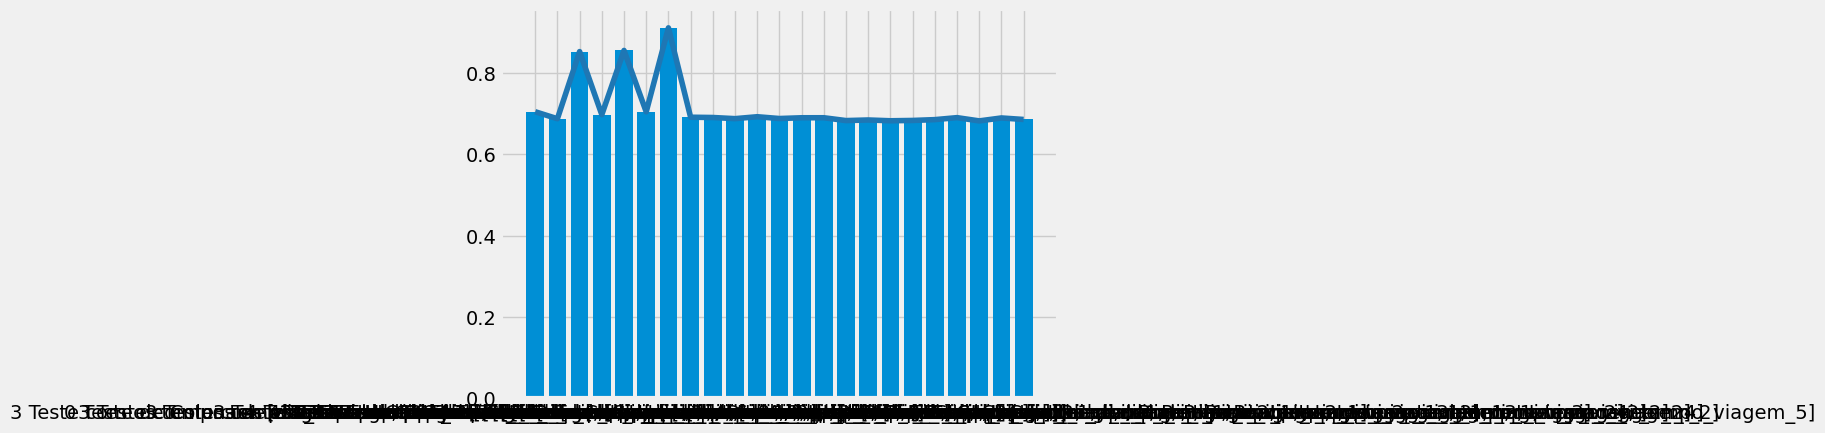

In [68]:
plt.bar(a['Teste'],a['Valor'])
plt.plot(a['Teste'],a['Valor'], color="#1f77b4")
plt.show()